This model is based off of a neural network that performed well (> 99% accuracy) in model 2 for one of the authors (Purkeypile).

In [1]:
# loading of the data in this cell based on Maha's cv_project 
import opendatasets as od

od.download("https://www.kaggle.com/datasets/alistairking/recyclable-and-household-waste-classification")

import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the main images folder
image_folder = './recyclable-and-household-waste-classification/images/images'

# Traverse the subdirectories and list images
image_paths = []
for root, dirs, files in os.walk(image_folder):
    for file in files:
        # Append full path for each image file
        image_paths.append(os.path.join(root, file))


Skipping, found downloaded files in ".\recyclable-and-household-waste-classification" (use force=True to force download)


./recyclable-and-household-waste-classification/images/images\aerosol_cans\default\Image_1.png


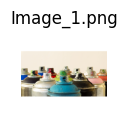

./recyclable-and-household-waste-classification/images/images\aerosol_cans\default\Image_10.png


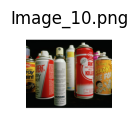

./recyclable-and-household-waste-classification/images/images\aerosol_cans\default\Image_100.png


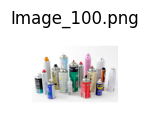

./recyclable-and-household-waste-classification/images/images\aerosol_cans\default\Image_101.png


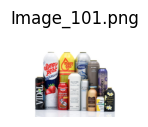

./recyclable-and-household-waste-classification/images/images\aerosol_cans\default\Image_102.png


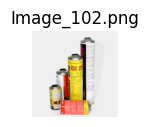

In [2]:
# Display a few sample images
for i, image_path in enumerate(image_paths[:5]):  # Show the first 5 images
    print(image_path)
    image = Image.open(image_path)

    # Display the image
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(os.path.basename(image_path))
    plt.show()

In [3]:
import os
import shutil
import random

# Define paths
dataset_dir = './recyclable-and-household-waste-classification/images/images'
train_dir = './split_dataset/train/images'
val_dir = './split_dataset/val/images'

# Ensure train and val directories exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Process each class in the dataset directory
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):  # Ensure it’s a directory (class folder)
        # Create class folders in train and val directories
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

        # Collect all image file paths from any subdirectories within this class folder
        images = []
        for root, _, files in os.walk(class_path):
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image file extensions
                    images.append(os.path.join(root, file))

        # Shuffle and split images into 80/20 train/val sets
        random.shuffle(images)
        split_idx = int(len(images) * 0.8)
        train_images = images[:split_idx]
        val_images = images[split_idx:]

        # Copy images to train and val directories
        for image_path in train_images:
            dest_path = os.path.join(train_dir, class_name, os.path.basename(image_path))
            shutil.copyfile(image_path, dest_path)

        for image_path in val_images:
            dest_path = os.path.join(val_dir, class_name, os.path.basename(image_path))
            shutil.copyfile(image_path, dest_path)

print("Dataset successfully split into train and val folders!")

Dataset successfully split into train and val folders!


In [8]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import os

IMG_SIZE = 224

# Define data transformations
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),  # Resize images to a consistent size
    transforms.ToTensor(),          # Convert to tensor
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize with ImageNet mean and std
])

# Load datasets
train_dataset = ImageFolder(root=train_dir, transform=transform)
val_dataset = ImageFolder(root=val_dir, transform=transform)

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [7]:
class_names = train_dataset.classes
print("Class labels:", class_names)

num_classes = len(train_dataset.classes)
print("\nNumber of classes: " + str(num_classes))

Class labels: ['aerosol_cans', 'aluminum_food_cans', 'aluminum_soda_cans', 'cardboard_boxes', 'cardboard_packaging', 'clothing', 'coffee_grounds', 'disposable_plastic_cutlery', 'eggshells', 'food_waste', 'glass_beverage_bottles', 'glass_cosmetic_containers', 'glass_food_jars', 'magazines', 'newspaper', 'office_paper', 'paper_cups', 'plastic_cup_lids', 'plastic_detergent_bottles', 'plastic_food_containers', 'plastic_shopping_bags', 'plastic_soda_bottles', 'plastic_straws', 'plastic_trash_bags', 'plastic_water_bottles', 'shoes', 'steel_food_cans', 'styrofoam_cups', 'styrofoam_food_containers', 'tea_bags']

Number of classes: 30


In [16]:
#### RAW COPY FROM MODULE 2- NEED TO UPDATE ####
# based on the following:
# https://medium.com/@BrendanArtley/mnist-keras-simple-cnn-99-6-731b624aee7f
from tensorflow.keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D
from keras.layers import BatchNormalization
  
CurDataFormat = 'channels_first'    # other option:'channels_last'

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format=CurDataFormat,
                 input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format=CurDataFormat))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model.add(Dropout(0.25))

#model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format=CurDataFormat))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
#model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format=CurDataFormat))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
model.add(Dropout(0.25))

#model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format=CurDataFormat))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(num_classes, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

#hist = model.fit(TrainInput, TrainTarget, epochs = 20, batch_size = 128,
#                  validation_data=(TestInput, TestTarget), verbose = 1)

#ValueError: Exception encountered when calling Sequential.call().
#
#Input 0 of layer "conv2d_12" is incompatible with the layer: expected axis 1 of input shape to have value 224, but received input with shape (None, 3, 224, 224)
#
#Arguments received by Sequential.call():
#  • inputs=tf.Tensor(shape=(None, 3, 224, 224), dtype=float32)
#  • training=True
#  • mask=None
#hist = model.fit(train_loader, epochs = 20, batch_size = 256,
#                  validation_data = val_loader, verbose = 1)

hist = model.fit(train_loader, epochs = 20, batch_size = 256,
                 validation_data = val_loader, verbose = 1)

Epoch 1/20


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_12" is incompatible with the layer: expected axis 1 of input shape to have value 224, but received input with shape (None, 3, 224, 224)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 3, 224, 224), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# Measure test accuracy
scores = hist.history['accuracy']
print("Accuracy: %.2f%%" % (scores[1]*100))

In [ ]:
# Draw Learning curve
def learning_curve(hist):
  #Create a function to draw learning curves
  # This will help you to just call this function in future for drawing the learning curves
  metrics = ['loss', 'accuracy']
  # based on the lab
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(hist.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(hist.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])